In [2]:
from statistics import correlation

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets.csv")

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [6]:
df.shape

(20770, 22)

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [8]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [11]:
df.shape

(20736, 22)

In [12]:
a = df.duplicated().sum()
print(a)

12


In [13]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
6,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
7,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
8,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
9,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1
10,4.958498e+07,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,29/07/23,0.16,139.0,276.0,2.0,No License,5,1,1,1
20736,7.990000e+17,Rental unit in New York · 2 bedrooms · 2 beds ...,224733902,CozySuites Copake,Manhattan,Upper East Side,40.768970,-73.957592,Entire home/apt,153.0,...,15/09/23,0.41,8.0,308.0,2.0,No License,No rating,2,2,2
20737,5.930000e+17,Rental unit in New York · ★4.79 · 2 bedrooms ·...,23219783,Rob,Manhattan,West Village,40.730220,-74.002910,Entire home/apt,175.0,...,22/11/23,2.03,4.0,129.0,25.0,No License,4.79,2,2,1
20738,9.230000e+17,Loft in New York · ★4.33 · 1 bedroom · 2 beds ...,520265731,Rodrigo,Manhattan,Greenwich Village,40.728390,-73.999540,Entire home/apt,156.0,...,02/01/24,2.60,1.0,356.0,9.0,Exempt,4.33,1,2,1
20739,1.336161e+07,Rental unit in New York · ★4.89 · 2 bedrooms ·...,8961407,Jamie,Manhattan,Harlem,40.805700,-73.946250,Entire home/apt,397.0,...,08/09/23,1.08,3.0,274.0,3.0,No License,4.89,2,2,1
20740,5.119566e+07,Rental unit in New York · Studio · 1 bed · 1 bath,51501835,Jeniffer,Manhattan,Chinatown,40.718360,-73.995850,Entire home/apt,100.0,...,25/05/23,0.08,139.0,306.0,1.0,No License,No rating,Studio,1,1


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths


In [16]:
df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [17]:
df["id"] = df["id"].astype(object)
df["host_id"] = df["host_id"].astype(object)
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

EDA-
Data Analysis-
Univariate analysis

Idenfying outliers for price

In [18]:
df["price"]

0         55.0
1        144.0
2        187.0
3        120.0
4         85.0
         ...  
20765     45.0
20766    105.0
20767    299.0
20768    115.0
20769    102.0
Name: price, Length: 20724, dtype: float64

<Axes: xlabel='price'>

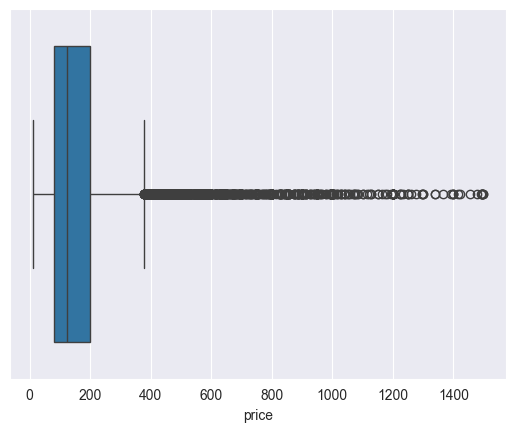

In [19]:
df = df[df["price"] < 1500]
sns.boxplot(data= df,x = "price")


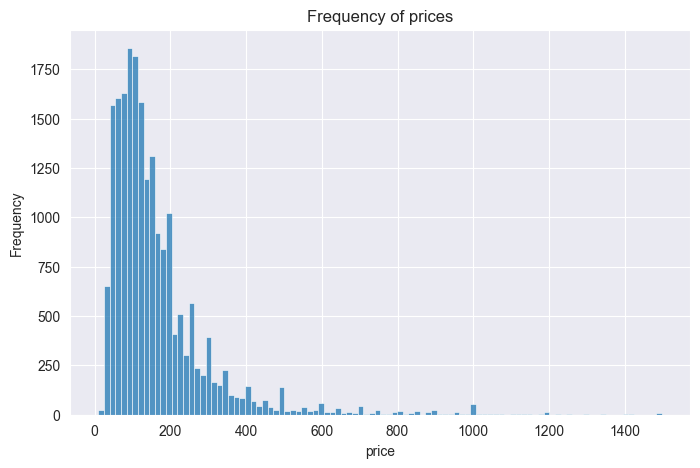

In [51]:
plt.figure(figsize=(8,5))
plt.title("Frequency of prices")
sns.histplot(data = df,x = "price",bins=100)
plt.ylabel("Frequency")
plt.show()

In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [23]:
df.groupby(by = "neighbourhood_group")["price"].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

In [24]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [25]:
df["price"] = df["price"].astype(object)
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [26]:
df["price_per_bed"] = df["price"] / df["beds"]

In [27]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price_per_bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


**Bi variable analysis**
one variable dependcy in other variable

In [32]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price_per_bed'],
      dtype='object')

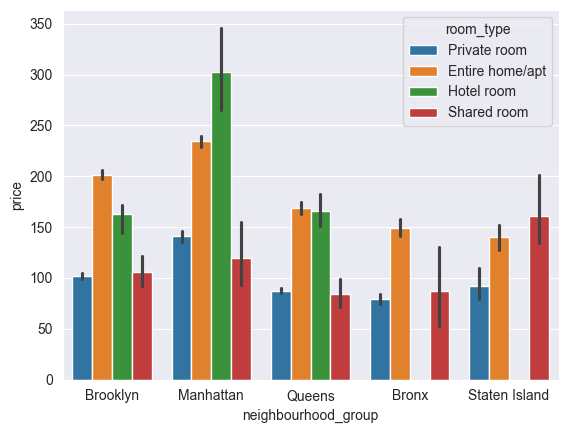

In [35]:
sns.barplot(x = "neighbourhood_group",y = "price",hue="room_type",data = df)
plt.show()

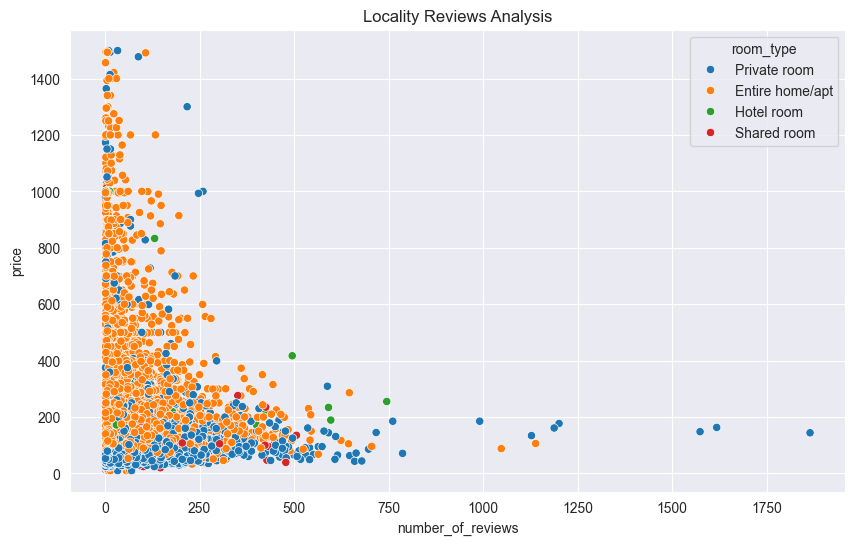

In [48]:
plt.figure(figsize=(10,6))
plt.title("Locality Reviews Analysis")
sns.scatterplot(x = "number_of_reviews",y= "price",hue="room_type",data = df)
plt.show()

In [52]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price_per_bed'],
      dtype='object')

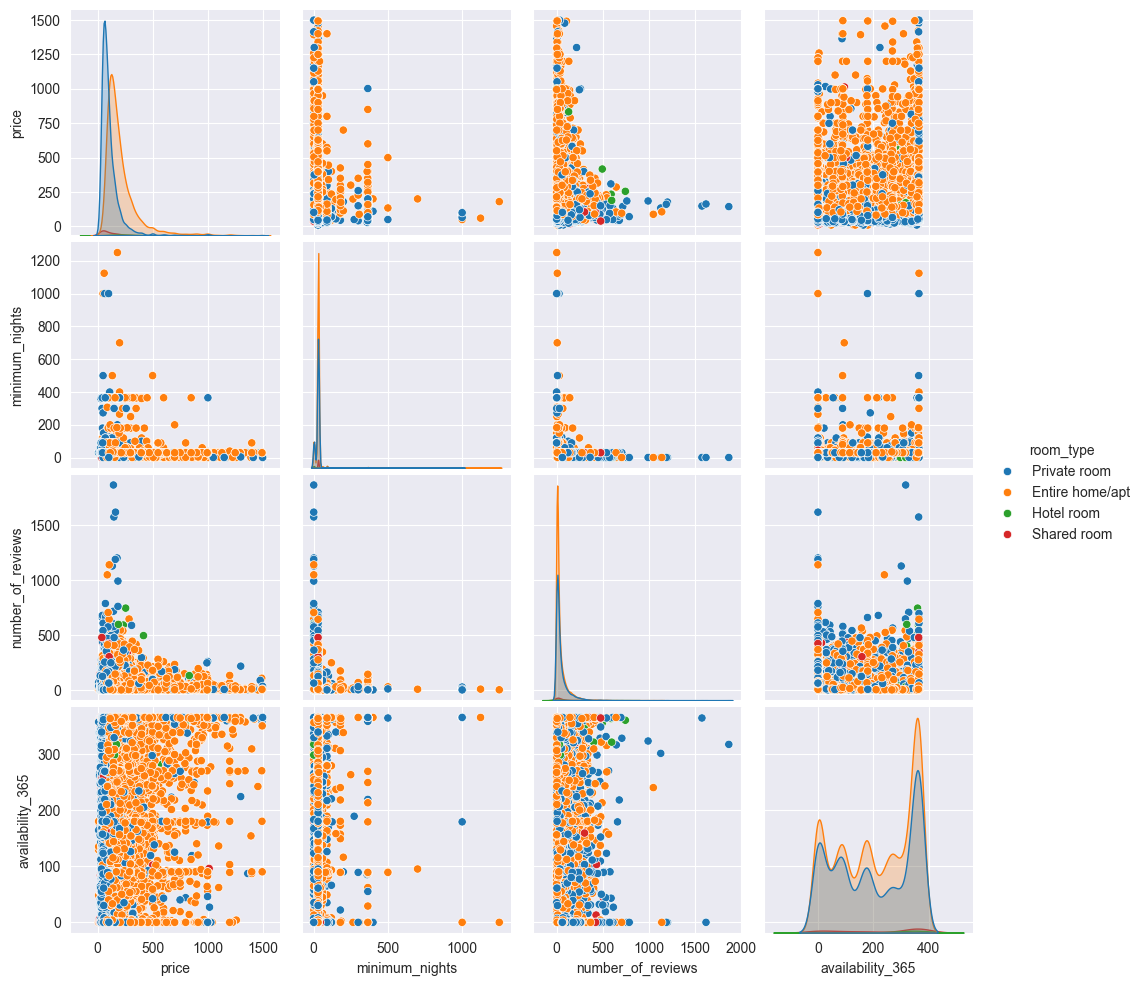

In [53]:
sns.pairplot(data = df, vars = ["price","minimum_nights","number_of_reviews","availability_365"],hue = "room_type")
plt.show()

Geographical Distribution of Airbnb

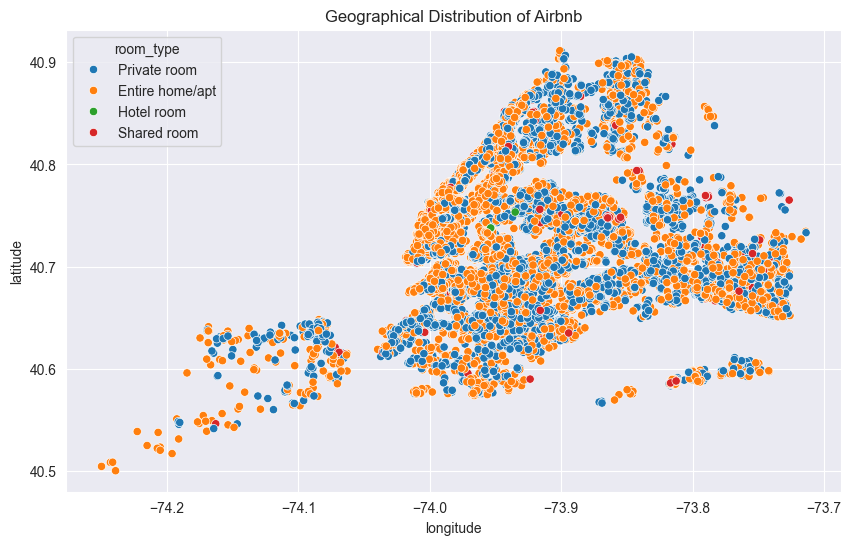

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="longitude",y="latitude",data = df,hue="room_type")
plt.title("Geographical Distribution of Airbnb")
plt.show()

In [61]:
corr = df[['latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews',"reviews_per_month","availability_365","beds"]].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,-0.005941,-0.071753
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,0.063523,0.041832
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,0.048036,0.415278
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.035466,-0.025852
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.049656,0.040071
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.040116,0.053496
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,1.000000,0.065985
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,0.065985,1.000000


<Axes: >

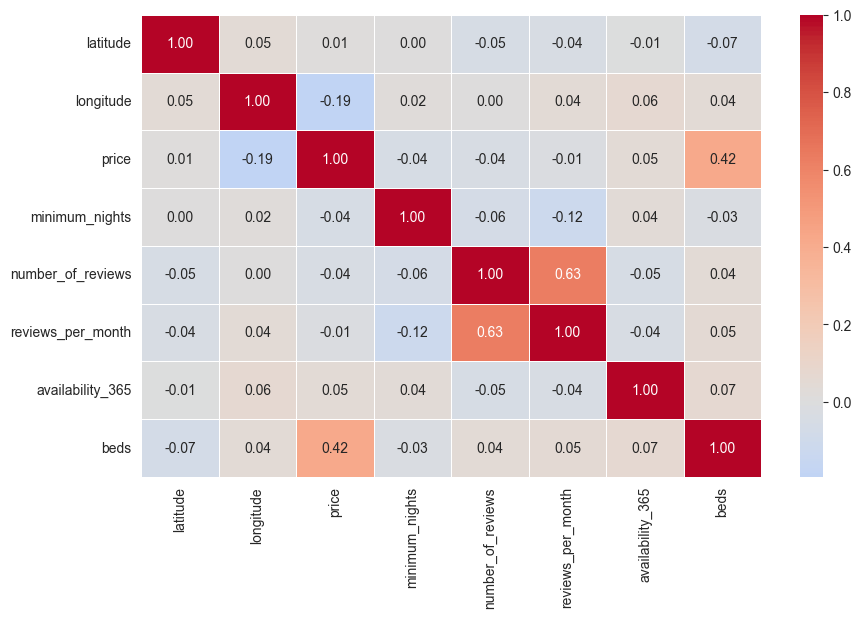

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(data = corr,annot=True,fmt=".2f",cmap="coolwarm",center=0,linewidths=0.5)